## importing libraries

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [56]:
import warnings
warnings.filterwarnings('ignore')

## importing dataset

In [2]:
unemp=pd.read_csv("Unemployment in India.csv")
unemp.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [37]:
unemp=unemp.rename(columns={unemp.columns[0]:"States"})
unemp.head()

,States,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


## Exploring dataset

In [60]:
unemp[' Date'] = pd.to_datetime(unemp[' Date'])
unemp.dtypes

States                                              object
 Date                                       datetime64[ns]
 Frequency                                          object
 Estimated Unemployment Rate (%)                   float64
 Estimated Employed                                float64
 Estimated Labour Participation Rate (%)           float64
Area                                                object
dtype: object

In [38]:
unemp.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [61]:
unemp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   States                                    740 non-null    object        
 1    Date                                     740 non-null    datetime64[ns]
 2    Frequency                                740 non-null    object        
 3    Estimated Unemployment Rate (%)          740 non-null    float64       
 4    Estimated Employed                       740 non-null    float64       
 5    Estimated Labour Participation Rate (%)  740 non-null    float64       
 6   Area                                      740 non-null    object        
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 42.1+ KB


In [40]:
unemp.duplicated().sum()

27

In [41]:
unemp.isnull().sum()

States                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [62]:
unemp.dtypes

States                                              object
 Date                                       datetime64[ns]
 Frequency                                          object
 Estimated Unemployment Rate (%)                   float64
 Estimated Employed                                float64
 Estimated Labour Participation Rate (%)           float64
Area                                                object
dtype: object

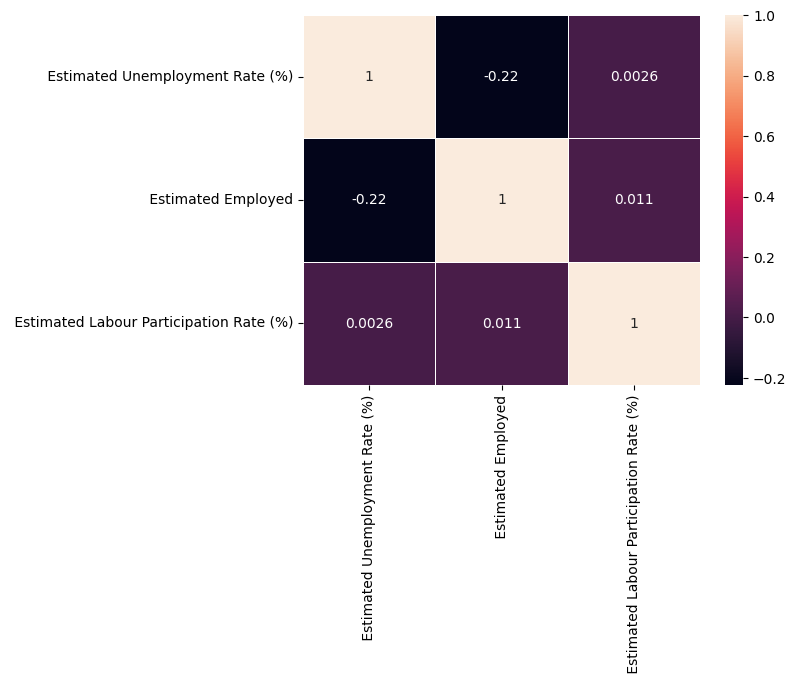

In [58]:
correlation=unemp.corr()
ax=sns.heatmap(correlation,annot=True,linewidths=0.5)
plt.show()

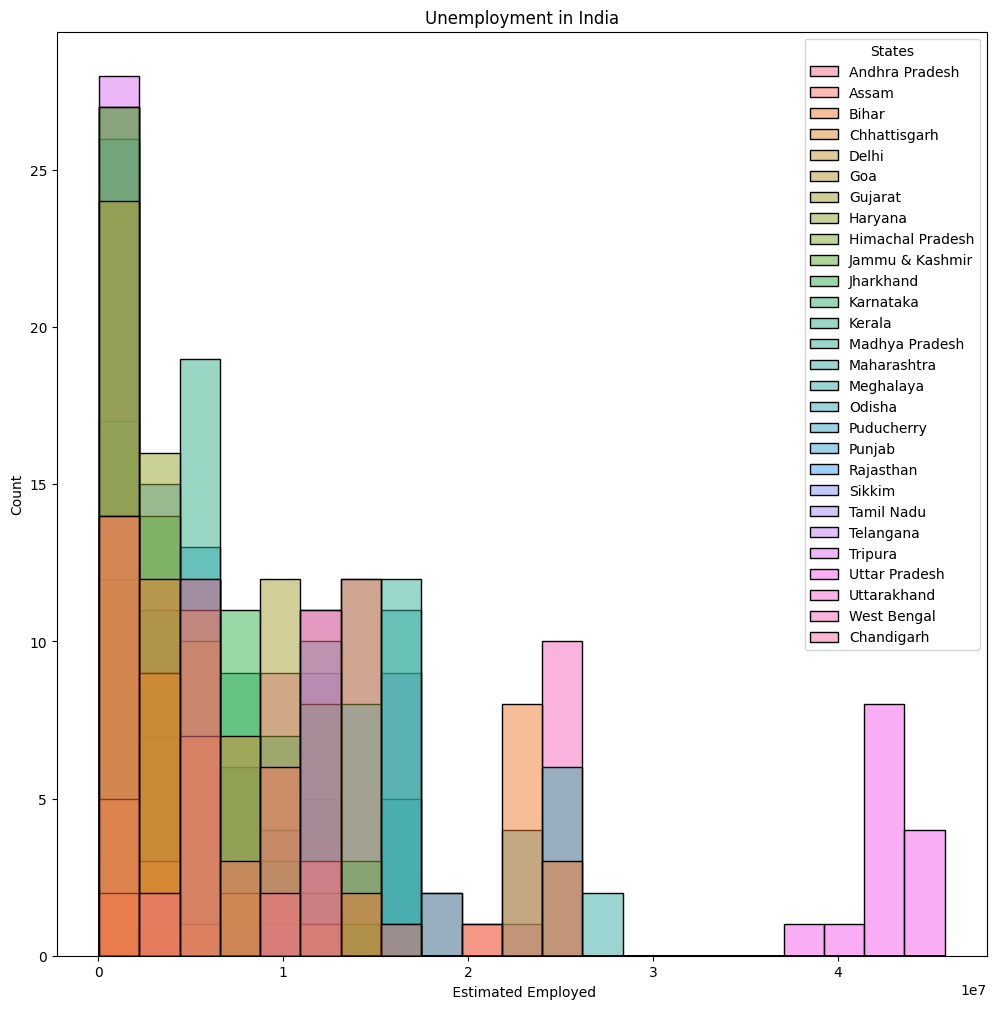

In [45]:
plt.figure(figsize=(12,12))
plt.title("Unemployment in India")
sns.histplot(x=unemp[" Estimated Employed"],hue="States",data=unemp)
plt.show()

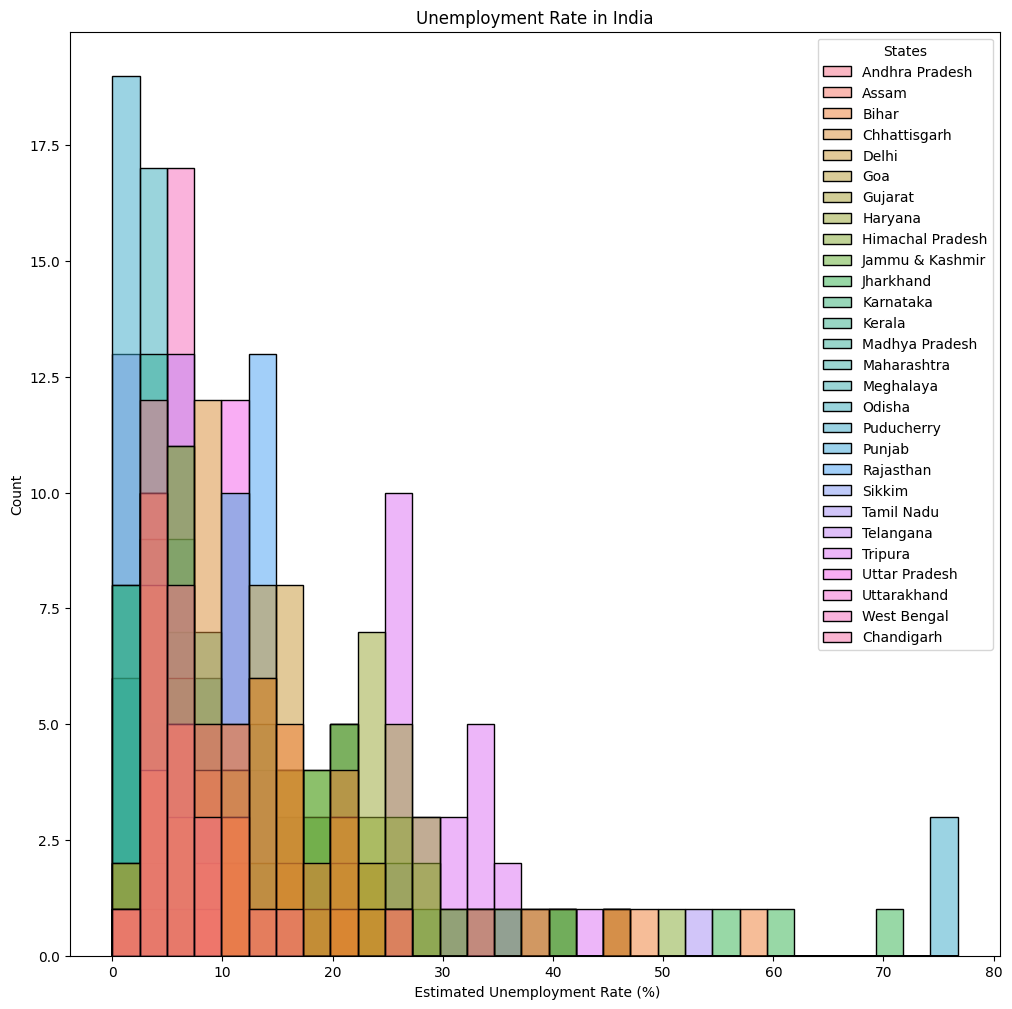

In [46]:
plt.figure(figsize=(12,12))
plt.title("Unemployment Rate in India")
sns.histplot(x=unemp[" Estimated Unemployment Rate (%)"],hue="States",data=unemp)
plt.show()

In [51]:
states=unemp["States"].unique()
print(states)

['Andhra Pradesh' 'Assam' 'Bihar' 'Chhattisgarh' 'Delhi' 'Goa' 'Gujarat'
 'Haryana' 'Himachal Pradesh' 'Jammu & Kashmir' 'Jharkhand' 'Karnataka'
 'Kerala' 'Madhya Pradesh' 'Maharashtra' 'Meghalaya' 'Odisha' 'Puducherry'
 'Punjab' 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Telangana' 'Tripura'
 'Uttar Pradesh' 'Uttarakhand' 'West Bengal' nan 'Chandigarh']


In [54]:
size_states=unemp.pivot_table(index=["States"],aggfunc='size')
print(size_states)

States
Andhra Pradesh      28
Assam               26
Bihar               28
Chandigarh          12
Chhattisgarh        28
Delhi               28
Goa                 24
Gujarat             28
Haryana             28
Himachal Pradesh    28
Jammu & Kashmir     21
Jharkhand           28
Karnataka           28
Kerala              28
Madhya Pradesh      28
Maharashtra         28
Meghalaya           27
Odisha              28
Puducherry          26
Punjab              28
Rajasthan           28
Sikkim              17
Tamil Nadu          28
Telangana           28
Tripura             28
Uttar Pradesh       28
Uttarakhand         27
West Bengal         28
dtype: int64


In [52]:
regions=unemp["Area"].unique()
print(regions)

['Rural' nan 'Urban']


In [55]:
unemp.groupby("Area").size()

Area
Rural    359
Urban    381
dtype: int64

## Unemployment Rate during covid-19

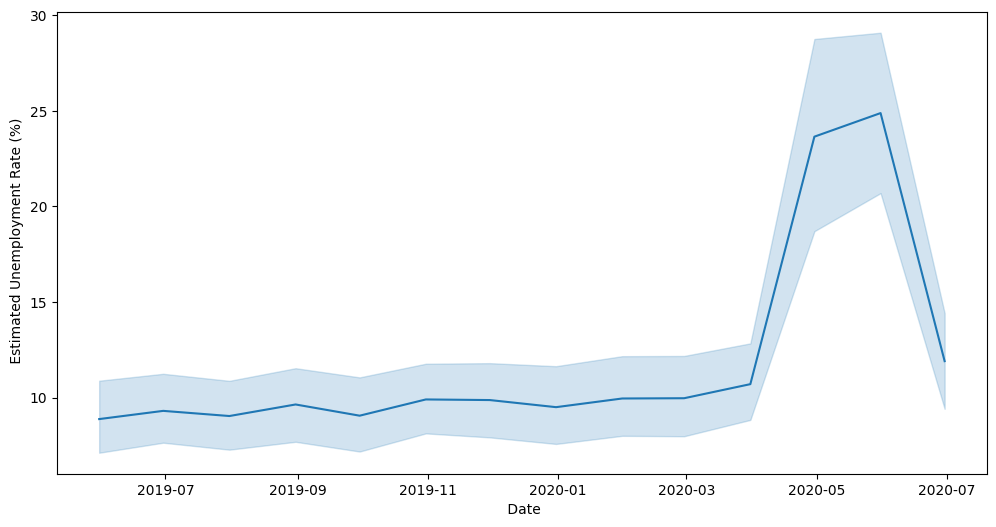

In [65]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=unemp, x=' Date', y=' Estimated Unemployment Rate (%)')
plt.show()